# Linear Regression

Sample code to linear regression from UFFS - Machine Learning

Lets import numpy and plot utilities. We will use it further.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

## Dataset

Our dataset is located in `./datasets/foodtruck.txt` and has as first column the population (in thousands) of a city and the second one as the profit of a Food Truck in that city.

As our dataset is not large we will import all its data to memory, then convert to Numpy matrices shaped as columns

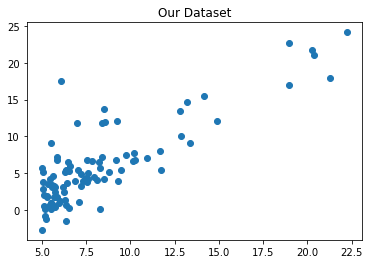

In [2]:
f = open('./datasets/foodtruck.txt')

lines = f.readlines() # Import all dataset to mem
dataset = list(map(lambda x: x.split(','), lines))

shuffle(dataset)

X = np.array([d[0] for d in dataset], dtype=float).reshape(-1, 1)
y = np.array([d[1] for d in dataset], dtype=float).reshape(-1, 1)

plt.plot(X, y, 'o')
plt.title('Our Dataset')
plt.show()

As for linear regression we will need to every entry in `X` (which we call "features") to have a weight, we will create a matrix `theta`, but further than the weights we also need a bias, a value that will be summed up to adjust the approximation function:

X(train=30 test=67)
Y(train=30 test=67)


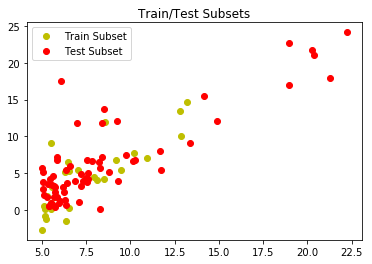

In [3]:
theta = np.array([[0.2, 0.2]])

# Size of test subset
test_size = 0.7

# How many of X are for testing
xt = int(X.shape[0] * test_size)

# Split sets
Xtrain_ = X[xt:]
Xtest_ = X[:xt]

# Insert bias
Xtrain = np.insert(Xtrain_, 0, 1, axis=1)
Xtest = np.insert(Xtest_, 0, 1, axis=1)

print("X(train={tr} test={tst})".format(tr=len(Xtrain), tst=len(Xtest)))

# Same to Y
yt = int(y.shape[0] * test_size)
ytrain = y[yt:]
ytest  = y[:yt]

assert Xtrain.shape[0] == ytrain.shape[0]
assert Xtest.shape[0] == ytest.shape[0]
assert Xtrain.shape[0] + Xtest.shape[0] == X.shape[0]
assert ytrain.shape[0] + ytest.shape[0] == y.shape[0]

print("Y(train={tr} test={tst})".format(tr=len(ytrain), tst=len(ytest)))

plt.plot(Xtrain_, ytrain, 'oy')
plt.plot(Xtest_, ytest, 'or')
plt.legend(('Train Subset', 'Test Subset'))
plt.title('Train/Test Subsets')
plt.show()

## Cost function

In [4]:
def J(X, y, theta):
    """
    Cost function
    """
    m = X.shape[0]
    return np.sum((X.dot(theta.T) - y) ** 2) / (2*m)

## Gradient Descent

Theta: [[-6.29365406  1.44449063]]
Train Set Cost: 3.3842729440310273


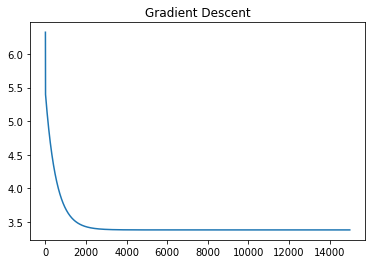

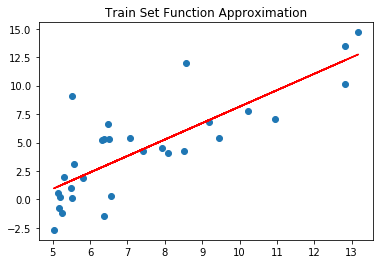

In [5]:
alpha = 0.01
xs = []
gradient = []

for i in range(15000):
    yhat = Xtrain.dot(theta.T)
    error = yhat - ytrain
    dvt = error.T.dot(Xtrain) / Xtrain.shape[0]
    theta = theta - alpha * dvt
    
    # Storing data for plotting
    xs.append(i)
    gradient.append(J(Xtrain, ytrain, theta))
    
    # Check if we are done
    #if i > 2 and abs(gradient[-2] - gradient[-1]) < 10**-9:
    #    print("Stopped at iteraction {it}".format(it=i))
    #    break

print("Theta:", theta)
print("Train Set Cost:", J(Xtrain, ytrain, theta))
plt.plot(xs, gradient)
plt.title("Gradient Descent")
plt.show()

plt.plot(Xtrain_, ytrain, 'o', Xtrain_, Xtrain.dot(theta.T), 'r-')
plt.title('Train Set Function Approximation')
plt.show()

Test Set Cost: 5.731322610679109


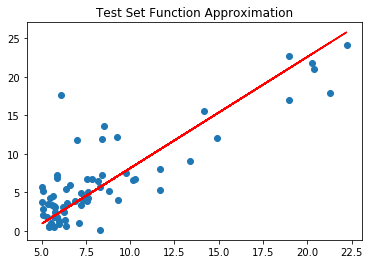

In [6]:
print("Test Set Cost:", J(Xtest, ytest, theta))
plt.plot(Xtest_, ytest, 'o', Xtest_, Xtest.dot(theta.T), 'r-')
plt.title('Test Set Function Approximation')
plt.show()